In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
from splinter import Browser
import pandas as pd
import itertools
from datetime import datetime

In [ ]:
team_identification = pd.read_csv('team_name_lookup.csv')

In [2]:
#Define Executable Path for ChromeDriver to use for web scraping

executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Define base endpoint URL. Other url's will be built off this endpoint.

baseball_reference_main = 'https://www.baseball-reference.com'
nats_schedule_endpoint = '/teams/WSN/2021-schedule-scores.shtml'
nats_schedule_page = baseball_reference_main + nats_schedule_endpoint
browser.visit(nats_schedule_page)

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script async="" src="https://snap.licdn.com/li.lms-analytics/insight.min.js" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/929333651348838?v=2.9.47&amp;r=stable"></script><script async="" src="https://connect.facebook.net/signals/plugins/identity.js?v=2.9.47"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script src="https://cdn.krxd.net/userdata/get?pub=9427dd0d-835c-471c-a5db-ab01ae8a681c&amp;technographics=1&amp;callback=Krux.ns.investingchannelinc.kxjsonp_userdata" type="text/javascript"></script><script src="https://beacon.krxd.net/optout_check?callback=Krux.ns.investingchannelinc.kxjsonp_optOutCheck" type="text/javas
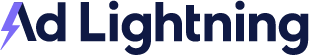

In [4]:
#Use Beautiful Soup HTML.parser to extract relvant details about news articles

schedule_html = browser.html
schedule_soup = bs(schedule_html, 'html.parser')
schedule_soup

In [5]:
# Extract list of games

game_listings = schedule_soup.find('table', class_="sortable stats_table now_sortable", id="team_schedule").find('tbody').find_all('tr',class_=lambda x: x != 'thead')
game_listings

[<tr data-row="0"><th class="right" data-stat="team_game" scope="row">1</th><td class="left" csk="2021-04-06" data-stat="date_game"><a href="/boxes/?date=2021-04-06" name="1" title="Click for standings on this date">Tuesday, Apr 6</a></td><td class="left" data-stat="boxscore"><a href="/boxes/WAS/WAS202104060.shtml">boxscore</a></td><td class="left" data-stat="team_ID">WSN</td><td class="left iz" data-stat="homeORvis"></td><td class="left" data-stat="opp_ID"><a href="/teams/ATL/2021.shtml">ATL</a></td><td class="left" data-stat="win_loss_result">W-wo</td><td class="right" data-stat="R">6</td><td class="right" data-stat="RA">5</td><td class="right iz" csk="8.50" data-stat="extra_innings"></td><td class="right" csk="1.0" data-stat="win_loss_record">1-0</td><td class="right" data-stat="rank">2</td><td class="right" csk="2" data-stat="games_back"> 1.0</td><td class="left" data-stat="winning_pitcher"><a href="/players/h/hudsoda01.shtml" title="Daniel Hudson">Hudson</a></td><td class="left" d

In [6]:
# test = game_listings[0]
# test

<tr data-row="0"><th class="right" data-stat="team_game" scope="row">1</th><td class="left" csk="2021-04-06" data-stat="date_game"><a href="/boxes/?date=2021-04-06" name="1" title="Click for standings on this date">Tuesday, Apr 6</a></td><td class="left" data-stat="boxscore"><a href="/boxes/WAS/WAS202104060.shtml">boxscore</a></td><td class="left" data-stat="team_ID">WSN</td><td class="left iz" data-stat="homeORvis"></td><td class="left" data-stat="opp_ID"><a href="/teams/ATL/2021.shtml">ATL</a></td><td class="left" data-stat="win_loss_result">W-wo</td><td class="right" data-stat="R">6</td><td class="right" data-stat="RA">5</td><td class="right iz" csk="8.50" data-stat="extra_innings"></td><td class="right" csk="1.0" data-stat="win_loss_record">1-0</td><td class="right" data-stat="rank">2</td><td class="right" csk="2" data-stat="games_back"> 1.0</td><td class="left" data-stat="winning_pitcher"><a href="/players/h/hudsoda01.shtml" title="Daniel Hudson">Hudson</a></td><td class="left" da

In [7]:
# boxscore_braves = test.find_all('td')[1]
# boxscore_braves_endpoint = boxscore_braves.a['href']
# boxscore_braves_endpoint

'/boxes/WAS/WAS202104060.shtml'

In [8]:
# boxscore_url = baseball_reference_main + boxscore_braves_endpoint
# browser.visit(boxscore_url)
# box_html = browser.html
# box_soup = bs(box_html, 'html.parser')

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script async="" src="https://snap.licdn.com/li.lms-analytics/insight.min.js" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script><script src="https://cdn.krxd.net/userdata/get?pub=9427dd0d-835c-471c-a5db-ab01ae8a681c&amp;callback=Krux.ns.investingchannelinc.kxjsonp_userdata" type="text/javascript"></script><script src="https://beacon.krxd.net/optout_check?callback=Krux.ns.investingchannelinc.kxjsonp_optOutCheck" type="text/javascript"></script><script src="https://consumer.krxd.net/consent/get/9427dd0d-835c-471c-a5db-ab01ae8a681c?idt=device&amp;dt=k
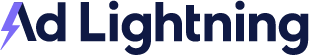

In [9]:
# box_soup

In [10]:
# score_metadata = box_soup.find('div', class_ = 'scorebox_meta').find_all('div')

In [11]:
# score_metadata

[<div>Tuesday, April 6, 2021</div>,
 <div>Start Time: 4:05 p.m. Local</div>,
 <div><strong>Attendance</strong>: 4,801</div>,
 <div><strong>Venue</strong>: Nationals Park</div>,
 <div><strong>Game Duration</strong>: 3:10</div>,
 <div>Day Game, on grass</div>,
 <div><a href="https://www.mlb.com/gameday/634624#game_tab=videos" rel="noopener" target="_blank">Video of game on MLB.com</a></div>,
 <div><em>Logos <a href="http://www.sportslogos.net/">via Sports Logos.net</a>
             / <a href="//www.sports-reference.com/blog/2016/06/redesign-team-and-league-logos-courtesy-sportslogos-net/">About logos</a></em></div>]

In [12]:
# game_meta_data = []

# for datapoint in score_metadata[:5]:
#     meta_contents = datapoint.contents
#     if len(meta_contents) > 1:
#         key_value_split = meta_contents[1].split(": ")[-1]
#         game_meta_data.append(key_value_split)
#     else:
#         key_value_split = meta_contents[0].split(": ",1)[-1]
#         game_meta_data.append(key_value_split)
        
# full_date = game_meta_data[0]
# print(full_date)

# year = full_date.split(',')[-1].strip()
# print(year)

Tuesday, April 6, 2021
2021


In [17]:
# inning_by_inning = box_soup.find('table', class_ = 'linescore nohover stats_table no_freeze').find('tbody').find_all('tr')

In [18]:
# inning_by_inning

[<tr>
 <td class="center">
 <div class="media-item logo loader">
 <img alt="2021 Atlanta Braves Logo" class="teamlogo" itemscope="image" src="https://d2p3bygnnzw9w3.cloudfront.net/req/202109021/tlogo/br/ATL-2021.png"/>
 <p><a href="http://www.sportslogos.net/">via Sports Logos.net</a></p>
 <p><a href="https://www.sports-reference.com/blog/2016/06/redesign-team-and-league-logos-courtesy-sportslogos-net/">About logos</a></p>
 </div>
 </td>
 <td><a href="/teams/ATL/2021.shtml">Atlanta Braves</a></td>
 <td class="center">2</td>
 <td class="center">1</td>
 <td class="center">1</td>
 <td class="center">0</td>
 <td class="center">0</td>
 <td class="center">0</td>
 <td class="center">1</td>
 <td class="center">0</td>
 <td class="center">0</td>
 <td class="center">5</td>
 <td class="center">7</td>
 <td class="center">1</td>
 </tr>,
 <tr>
 <td class="center">
 <div class="media-item logo loader">
 <img alt="2021 Washington Nationals Logo" class="teamlogo" itemscope="image" src="https://d2p3bygnn

In [19]:
# inning_info_by_team = []
# inning_info_by_team.append(full_date)
# inning_info_by_team.append(year)

# for index, team in enumerate(inning_by_inning):
#     data = team.find_all('td')
#     team_name = data[1].text.strip()
#     team_runs = data[-3].text.strip()
#     print(team_name)
#     print(team_runs)
#     if index == 0:
#         team_designation = 'AWAY'
#     else:
#         team_designation = 'HOME'
#     print(team_designation)
#     inning_info_by_team.append(team_name)
#     inning_info_by_team.append(team_runs)

# inning_info_dataframized = [inning_info_by_team]

Atlanta Braves
5
AWAY
Washington Nationals
6
HOME


In [20]:
# beginning_columns = ['gameDateFull','gameYear','awayTeam','awayScore','homeTeam','homeScore']

In [21]:
# game_dataframe = pd.DataFrame(inning_info_dataframized, columns = beginning_columns)
# game_dataframe

,gameDateFull,gameYear,awayTeam,awayScore,homeTeam,homeScore
0,"Tuesday, April 6, 2021",2021,Atlanta Braves,5,Washington Nationals,6


In [22]:


# date_object = datetime.strptime(full_date, "%A, %B %d, %Y")

# test_date = date_object.date().isoformat()

In [24]:
# game_dataframe = pd.DataFrame(combined_cleaned_team_lists, columns = inning_data_headers_text_final)

In [25]:
# game_id_starter =+ 1
# game_dataframe.insert(0, 'GAME_ID', game_id_starter)

In [27]:
# team_identification = pd.read_csv('team_name_lookup.csv')
# team_identification

,team_id,team_abbrev,team_full,league,division
0,1,ARI,Arizona Diamondbacks,NL,WEST
1,2,ATL,Atlanta Braves,NL,EAST
2,3,BAL,Baltimore Orioles,AL,EAST
3,4,BOS,Boston Red Sox,AL,EAST
4,5,CHW,Chicago White Sox,AL,CENTRAL
5,6,CHC,Chicago Cubs,NL,CENTRAL
6,7,CIN,Cinicinnati Reds,NL,CENTRAL
7,8,CLE,Cleveland Indians,AL,CENTRAL
8,9,COL,Colorado Rockies,NL,WEST
9,10,DET,Detroit Tigers,AL,CENTRAL


In [28]:
# away_team_list = game_dataframe['awayTeam'].to_list()
# home_team_list = game_dataframe['homeTeam'].to_list()

# awayTeamId = []
# homeTeamId = []

# for team in away_team_list:
#     team_unique_id = team_identification.loc[team_identification['team_full'] == team].iloc[0]['team_id']
#     print(team_unique_id)
#     awayTeamId.append(team_unique_id)

# for team in home_team_list:
#     team_unique_id = team_identification.loc[team_identification['team_full'] == team].iloc[0]['team_id']
#     print(team_unique_id)
#     homeTeamId.append(team_unique_id)
    

# game_dataframe['awayTeam'] = awayTeamId
# game_dataframe['homeTeam'] = homeTeamId

# game_dataframe

2
30


,gameDateFull,gameYear,awayTeam,awayScore,homeTeam,homeScore
0,"Tuesday, April 6, 2021",2021,2,5,30,6


In [29]:
# gameUniqueId = []
# for index, row in game_dataframe.iterrows():
#     away_team = row['awayTeam']
#     home_team = row['homeTeam']
#     if away_team >= 10:
#         away_team_twodig = str(away_team)
#     else:
#         away_team_twodig = '0' + str(away_team)
#     if home_team >= 10:
#         home_team_twodig = str(home_team)
#     else:
#         home_team_twodig = '0' + str(home_team)
    
#     new_date = test_date.replace("-","")

#     primary_id = new_date+away_team_twodig+home_team_twodig+'01'
    
#     if primary_id in gameUniqueId:
#         secondary_id = new_date+away_team_twodig+home_team_twodig+'02'
#         gameUniqueId.append(secondary_id)
#     else:
#         gameUniqueId.append(primary_id)
        
# gameUniqueId

['20210406023001']

In [30]:
# game_dataframe.insert(0, 'gameId', gameUniqueId)

In [31]:
# game_dataframe

,gameId,gameDateFull,gameYear,awayTeam,awayScore,homeTeam,homeScore
0,20210406023001,"Tuesday, April 6, 2021",2021,2,5,30,6


In [ ]:
all_game_info = []
beginning_columns = ['gameDateFull','gameYear','awayTeam','awayScore','homeTeam','homeScore']
for game in game_listings:
    boxscore = game.find_all('td')[1]
    boxscore_endpoint = boxscore_braves.a['href']
    boxscore_url = baseball_reference_main + boxscore_braves_endpoint
    browser.visit(boxscore_url)
    box_html = browser.html
    box_soup = bs(box_html, 'html.parser')
    score_metadata = box_soup.find('div', class_ = 'scorebox_meta').find_all('div')
    game_meta_data = []
    for datapoint in score_metadata[:5]:
        meta_contents = datapoint.contents
        if len(meta_contents) > 1:
            key_value_split = meta_contents[1].split(": ")[-1]
            game_meta_data.append(key_value_split)
        else:
            key_value_split = meta_contents[0].split(": ",1)[-1]
            game_meta_data.append(key_value_split)   
    full_date = game_meta_data[0]
    year = full_date.split(',')[-1].strip()
    date_object = datetime.strptime(full_date, "%A, %B %d, %Y")
    date_iso = date_object.date().isoformat()
    inning_by_inning = box_soup.find('table', class_ = 'linescore nohover stats_table no_freeze').find('tbody').find_all('tr')
    inning_info_by_team = []
    inning_info_by_team.append(date_iso)
    inning_info_by_team.append(year)
    for index, team in enumerate(inning_by_inning):
        data = team.find_all('td')
        team_name = data[1].text.strip()
        team_runs = data[-3].text.strip()
        if index == 0:
            team_designation = 'AWAY'
        else:
            team_designation = 'HOME'
        inning_info_by_team.append(team_name)
        inning_info_by_team.append(team_runs)
    all_game_info.append(inning_info_by_team)
    

In [ ]:
game_dataframe = pd.DataFrame(all_game_info, columns = beginning_columns)
game_dataframe

In [ ]:
away_team_list = game_dataframe['awayTeam'].to_list()
home_team_list = game_dataframe['homeTeam'].to_list()

awayTeamId = []
homeTeamId = []

for team in away_team_list:
    team_unique_id = team_identification.loc[team_identification['team_full'] == team].iloc[0]['team_id']
    awayTeamId.append(team_unique_id)

for team in home_team_list:
    team_unique_id = team_identification.loc[team_identification['team_full'] == team].iloc[0]['team_id']
    homeTeamId.append(team_unique_id)
    

game_dataframe['awayTeam'] = awayTeamId
game_dataframe['homeTeam'] = homeTeamId

In [ ]:
gameUniqueId = []
for index, row in game_dataframe.iterrows():
    away_team = row['awayTeam']
    home_team = row['homeTeam']
    if away_team >= 10:
        away_team_twodig = str(away_team)
    else:
        away_team_twodig = '0' + str(away_team)
    if home_team >= 10:
        home_team_twodig = str(home_team)
    else:
        home_team_twodig = '0' + str(home_team)
    
    new_date = test_date.replace("-","")

    primary_id = new_date+away_team_twodig+home_team_twodig+'01'
    
    if primary_id in gameUniqueId:
        secondary_id = new_date+away_team_twodig+home_team_twodig+'02'
        gameUniqueId.append(secondary_id)
    else:
        gameUniqueId.append(primary_id)

In [ ]:
game_dataframe.insert(0, 'gameId', gameUniqueId)